LSTM 기반 모델 2개 할 예정

과제 코멘트 : 층이 많다고, 무조건 좋은거 아님

In [ ]:
"""
one - hot encoding : 공간낭비, 단어의미 無
desne vector(밀집벡터) : 공간낭비 無, 실수로 표현

Embedding 기술의 시작 : word2vec

"""

In [1]:
import re
import urllib.request
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
# url 주소로 이동해서, 다운로드 하는 함수(urlretrieve)
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml",
                           filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7fc5c2438580>)

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
# re.sub(패턴, 명령 ,변수명)
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [10]:
print(len(result))

273424


In [11]:
result

[['here',
  'are',
  'two',
  'reasons',
  'companies',
  'fail',
  'they',
  'only',
  'do',
  'more',
  'of',
  'the',
  'same',
  'or',
  'they',
  'only',
  'do',
  'what',
  's',
  'new'],
 ['to',
  'me',
  'the',
  'real',
  'real',
  'solution',
  'to',
  'quality',
  'growth',
  'is',
  'figuring',
  'out',
  'the',
  'balance',
  'between',
  'two',
  'activities',
  'exploration',
  'and',
  'exploitation'],
 ['both',
  'are',
  'necessary',
  'but',
  'it',
  'can',
  'be',
  'too',
  'much',
  'of',
  'a',
  'good',
  'thing'],
 ['consider', 'facit'],
 ['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them'],
 ['facit', 'was', 'a', 'fantastic', 'company'],
 ['they',
  'were',
  'born',
  'deep',
  'in',
  'the',
  'swedish',
  'forest',
  'and',
  'they',
  'made',
  'the',
  'best',
  'mechanical',
  'calculators',
  'in',
  'the',
  'world'],
 ['everybody', 'used', 'them'],
 ['and',
  'what',
  'did',
  'facit',
  'do',
  'when',
  'the',
  'electronic',
  'calcu

In [12]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# Word2Vec으로 Embedding
# sg=0 : skipgram의 약자, skipgram이 아니다.
# skipgram : 중심단어로 주변단어 예측
# window : 좌측, 우측의 5개 단어
# min_count : 최소 5회 언급된 단어
# workers : 작업에 사용된 cpu

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [13]:
model.wv.most_similar('man')

[('woman', 0.8584614396095276),
 ('guy', 0.8143296837806702),
 ('lady', 0.7818775773048401),
 ('boy', 0.7688180208206177),
 ('girl', 0.7542381286621094),
 ('gentleman', 0.7450014352798462),
 ('soldier', 0.7348639965057373),
 ('kid', 0.695723295211792),
 ('rabbi', 0.665752112865448),
 ('horse', 0.6629002690315247)]

In [ ]:
# 한국어 워드투벡터 모델 생성

In [15]:
import urllib.request
from lxml import etree
import pandas as pd

urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

train_data=pd.read_table('ratings.txt')
train_data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [18]:
train_data.info()
train_data[train_data['document'].isnull()]
train_data=train_data.dropna(how='any')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199992 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        199992 non-null  int64 
 1   document  199992 non-null  object
 2   label     199992 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [21]:
# 문자열 대체
# train_data['document'].str.replace('포켓','포겟')

# 정규표현식으로 한글 이외의 내용 다 공백으로 처리
# 공백도 다 날러벼림
# train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ-가-힣]','')

# 공백을 한 칸줌으로, 한글 이외의 문자만 바꿈
train_data['document']=train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ-가-힣 ]','')

<ipython-input-21-368e522b5493>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document']=train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ-가-힣 ]','')
<ipython-input-21-368e522b5493>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['document']=train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ-가-힣 ]','')


In [22]:
train_data['document']

0                                       어릴때보고 지금다시봐도 재밌어요ㅋㅋ
1         디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...
2                          폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고
3          와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지
4                                안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화
                                ...                        
199995                                         포켓 몬스터 짜가 ㅡㅡ
199996                                                  쓰레기
199997                      완전 사이코영화 마지막은 더욱더 이 영화의질을 떨어트린다
199998                  왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ
199999                                      포풍저그가나가신다영차영차영차
Name: document, Length: 199992, dtype: object

In [24]:
# pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 41.0 MB/s eta 0:00:00


In [27]:
from konlpy.tag import Okt
okt=Okt()

In [28]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [29]:
tok_data=[]

for sent in train_data['document']:
    tok_sent=okt.morphs(sent) # 토큰

    # 불용어가 아닌 단어들의 리스트 만들기
    sw_rem_sent=[w for w in tok_sent if not w in stopwords]
    tok_data.append(sw_rem_sent)

In [31]:
import matplotlib.pyplot as plt

72


(array([7.5990e+03, 8.4390e+03, 2.7334e+04, 1.6461e+04, 3.0477e+04,
        1.3169e+04, 2.2554e+04, 9.6620e+03, 8.5780e+03, 1.3328e+04,
        4.9650e+03, 6.7480e+03, 2.4230e+03, 3.9250e+03, 1.6390e+03,
        2.9520e+03, 1.2650e+03, 1.2940e+03, 2.2310e+03, 1.0080e+03,
        1.7830e+03, 8.1000e+02, 1.5860e+03, 7.0900e+02, 7.3200e+02,
        1.4190e+03, 7.3300e+02, 1.5250e+03, 7.6800e+02, 1.4310e+03,
        6.2100e+02, 8.3700e+02, 2.4900e+02, 2.1600e+02, 2.5800e+02,
        8.0000e+01, 7.3000e+01, 2.7000e+01, 3.3000e+01, 1.4000e+01,
        1.7000e+01, 1.0000e+00, 4.0000e+00, 1.0000e+01, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.  ,  1.44,  2.88,  4.32,  5.76,  7.2 ,  8.64, 10.08, 11.52,
        12.96, 14.4 , 15.84, 17.28, 18.72, 20.16, 21.6 , 23.04, 24.48,
        25.92, 27.36, 28.8 , 30.24, 31.68, 33.12, 34.56, 36.  , 37.44,
        38.88, 40.32, 41.76, 43.2 , 44.64, 46.08, 47.52, 48.96, 50.4 ,
        51.84, 53.28, 54.72, 56.16

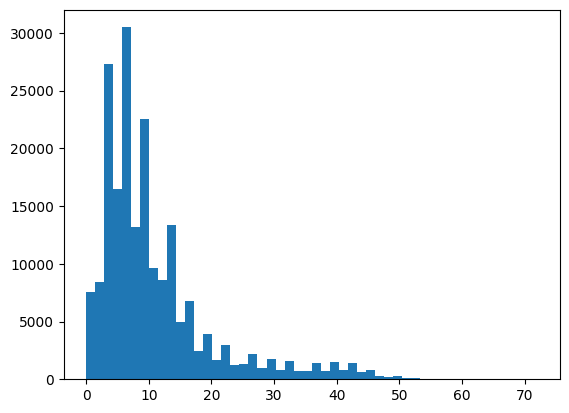

In [32]:
# 길이가 가장 긴 리뷰 출력
print(max(len(r) for r in tok_data))
plt.hist([len(r) for r in tok_data], bins=50)

In [38]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

# hyperparameter의 값이 참 애매하다..
# 데이터의 여러 요소들을 고려하고, 작업 환경 요소를 고려하여 설계해야함
# 정답은 없다.
model = Word2Vec(sentences=tok_data, vector_size=100, window=3, min_count=5, workers=4, sg=0)

In [39]:
model.wv.vectors.shape

(26182, 100)

In [43]:
model.wv.most_similar('컴퓨터')
model.wv.most_similar('책상')
model.wv.most_similar('부모')

[('가정', 0.8584651350975037),
 ('피해자', 0.854556143283844),
 ('자식', 0.8482815027236938),
 ('희생', 0.845866858959198),
 ('의사', 0.8448992371559143),
 ('자유', 0.8384111523628235),
 ('사람과', 0.8325594663619995),
 ('아버지', 0.829059362411499),
 ('어머니', 0.8284643888473511),
 ('행복', 0.8243204951286316)]

In [ ]:
# gensim에서word_2_vector 함수 찾아 볼 수 있다.
# model.wv.most_similar('키워드')
# 위키디피아 or pre_trained 데이터 불러 올 수 있음

# 자연어처리는 머신러닝으로 하면, 성능도 낮고, 할 이유도 없음
# 과거에 naive bayes로 한 적은 있음

In [44]:
# 워드투벡터, 글로브, 패스트텍스트, 엘모 → 트랜스포머 → GPT / BERT

from gensim.models import FastText
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

model=FastText(result, vector_size=100, window=5, min_count=5, workers=4, sg=1)

In [45]:
model.wv.most_similar('man')

[('batman', 0.8173238635063171),
 ('ekman', 0.7957517504692078),
 ('woman', 0.7925888895988464),
 ('shaman', 0.7845981121063232),
 ('hoffman', 0.7766736745834351),
 ('baptist', 0.7528771758079529),
 ('kahneman', 0.7522473931312561),
 ('stuntman', 0.7492220401763916),
 ('foreman', 0.7483050227165222),
 ('chapman', 0.7466797828674316)]

In [62]:
# LSTM 기반 분류기 만들기
# 행렬 계산 및 데이터 프레임 다루기
import numpy as np
import pandas as pd
# 시각화용
import matplotlib.pyplot as plt
# 웹에 있 데이터 다루기
import urllib.request

# 데이터 셋 나누기(학습, 확인)
from sklearn.model_selection import train_test_split

# 단어(문자)를 수치화 및 패딩으로 자리 맞추기
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [82]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin1')
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [83]:
data.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [84]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [85]:
data.columns

del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [86]:
data['v1']=data['v1'].replace(['ham', 'spam'],[0,1])
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [87]:
data.columns=['label', 'title']
data

,label,title
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [88]:
data.info()
print()
data.describe()
print()
data.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   title   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB




label  title                                                                                                                                                                                                        
0      Sorry, I'll call later                                                                                                                                                                                           30
       I cant pick the phone right now. Pls send a message                                                                                                                                                              12
       Ok...                                                                                                                                                                                                            10
1      Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£

In [89]:
# 중복되는 제목 확인
print(data['title'].nunique())

# title이 중복인 데이터 지우기
data.drop_duplicates(subset=['title'],inplace=True)
print(len(data['title']))

5169
5169


In [ ]:
"""
meta learning

few shot learning : 적은 사진으로 딥러닝 돌리기
"""

In [91]:
ydata=data['label']
xdata=data['title']

In [100]:
# 실습 data는 y값의 편차가 심해, train으로 다 몰릴 수 있다.
# 층화추출로 해결 가능 stratify
# 층화추출: 종류에따라 균등하게 분리하여 추출하는 방법
# random_state= 난수
xtrain, xtest, ytrain, ytest=train_test_split(xdata,ydata,
                                              test_size=0.2,
                                              random_state=20230728,
                                              stratify=ydata)
print(len(ytest))
print(xtrain.iloc[0])
print(xtest.iloc[0])

1034
No. She's currently in scotland for that.
U still going to the mall?


In [101]:
xtrain

1420            No. She's currently in scotland for that.
3801            No da. I am happy that we sit together na
1153    1000's of girls many local 2 u who r virgins 2...
3157    Thank u. IT BETTER WORK OUT CAUSE I WILL FEEL ...
4211    Missed call alert. These numbers called but le...
                              ...                        
698                        Mum ask Ì_ to buy food home...
5519    Can you pls send me that company name. In saib...
5503    Perhaps * is much easy give your account ident...
4689                                           Ok no prob
4456    Aight should I just plan to come up later toni...
Name: title, Length: 4135, dtype: object

In [102]:
ytrain.value_counts()

0    3613
1     522
Name: label, dtype: int64

In [ ]:
"""
1. 단어에 대한 전처리(모델 성능이 더 개선 되도록)
"""

In [104]:
# 객체 생성
tok=Tokenizer()
# xtrain을 corpus로 하여 fitting 및 단어별 인덱스 부여
tok.fit_on_texts(xtrain)
xtrain_enc=tok.texts_to_sequences(xtrain)

In [109]:
xtrain_enc
w2i=tok.word_index
w2i

{'i': 1,
 'you': 2,
 'to': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'that': 17,
 'call': 18,
 'on': 19,
 '2': 20,
 'are': 21,
 'so': 22,
 'now': 23,
 'but': 24,
 'not': 25,
 'or': 26,
 'can': 27,
 'do': 28,
 'get': 29,
 "i'm": 30,
 'at': 31,
 'be': 32,
 'with': 33,
 'we': 34,
 'no': 35,
 'just': 36,
 'if': 37,
 'will': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 '4': 42,
 'from': 43,
 'lt': 44,
 'gt': 45,
 'how': 46,
 'when': 47,
 'what': 48,
 'ok': 49,
 'go': 50,
 'out': 51,
 'all': 52,
 'free': 53,
 'know': 54,
 'like': 55,
 'got': 56,
 'then': 57,
 'was': 58,
 'good': 59,
 'come': 60,
 'am': 61,
 'time': 62,
 'its': 63,
 'want': 64,
 'day': 65,
 'only': 66,
 'love': 67,
 'there': 68,
 'he': 69,
 'text': 70,
 'one': 71,
 'send': 72,
 'by': 73,
 'as': 74,
 'need': 75,
 'going': 76,
 'home': 77,
 'about': 78,
 'still': 79,
 'r': 80,
 'txt': 81,
 'see': 82,
 'da': 83,
 'back': 84,
 'lor'

In [111]:
len(w2i)         #7831
xtrain.shape     # 4135
xtest.shape      # 1034
xtrain
type(xtrain_enc) # 2중 list 구조 중 가장 길이가 긴 list를 찾자.

# map(적용함수, 데이터)
# xtrain_enc에서 가장 긴 list의 길이
maxLen=max(map(len, xtrain_enc))
maxLen
# 어째서 0이?
# min(map(len, xtrain_enc))

# 응용 list의 평균 길이
# sum(map(len, xtrain_enc))/len(xtrain_enc)

121

In [113]:
xtrain_padded=pad_sequences(xtrain_enc, maxlen=maxLen)

In [117]:
xtrain_padded.shape

(4135, 121)

In [120]:
# 단어번호 1번 부터 부여
# 0 패딩을 했으므로 1을 더하여 단어사전크기를 설정

vocab_size=len(w2i)+1

In [115]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [122]:
model=Sequential()
model.add(Embedding(vocab_size, 32))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=['accuracy'])

In [124]:
history=model.fit(xtrain_padded, ytrain, epochs=5, batch_size=32,
                  validation_split=0.2)

Epoch 1/5
104/104 [==============================] - 5s 32ms/step - loss: 0.4573 - accuracy: 0.8180 - val_loss: 0.3369 - val_accuracy: 0.8718
Epoch 2/5
104/104 [==============================] - 4s 34ms/step - loss: 0.3034 - accuracy: 0.8670 - val_loss: 0.1698 - val_accuracy: 0.9383
Epoch 3/5
104/104 [==============================] - 3s 27ms/step - loss: 0.0815 - accuracy: 0.9752 - val_loss: 0.0676 - val_accuracy: 0.9807
Epoch 4/5
104/104 [==============================] - 3s 27ms/step - loss: 0.0486 - accuracy: 0.9855 - val_loss: 0.0847 - val_accuracy: 0.9746
Epoch 5/5
104/104 [==============================] - 3s 27ms/step - loss: 0.0321 - accuracy: 0.9903 - val_loss: 0.0831 - val_accuracy: 0.9686


In [130]:
# from keras.models import load_model
# model.save('이름.확장자') : 모델 저장
# model = load_model('이름.확장자') : 모델 불러오기

In [131]:
# xtest_enc=tok.texts_to_sequences(xtest)
xtest_padded=pad_sequences(xtest_enc, maxlen=maxLen)

In [129]:
# model.predict(xtest_padded)
model.evaluate(xtest_padded, ytest)

33/33 [==============================] - 0s 9ms/step - loss: 0.0726 - accuracy: 0.9787


[0.0725562646985054, 0.978723406791687]